In [1]:
# Import the pandas library, which provides data structures and data analysis tools.
import pandas as pd

# Use the pandas function ExcelFile to read the Excel file located at the specified path.
xl = pd.ExcelFile("/content/TableauSalesData (1).xlsx")

# Parse the "Orders" sheet of the Excel file and store the data in a DataFrame named SalesData.
SalesData = xl.parse("Orders")


In [2]:
!pip install openpyxl==3.0.9

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install pandas

# ***Sales Performance Analysis***

In [5]:
# Print the first 10 rows of the SalesData DataFrame. This is useful for getting a quick look at the data.
print(SalesData.head(10))

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0    4919  CA-2017-160304 2017-01-02 2017-01-07  Standard Class    BM-11575   
1    4920  CA-2017-160304 2017-01-02 2017-01-07  Standard Class    BM-11575   
2    3074  CA-2017-125206 2017-01-03 2017-01-05     First Class    LR-16915   
3    8604  US-2017-116365 2017-01-03 2017-01-08  Standard Class    CA-12310   
4    8605  US-2017-116365 2017-01-03 2017-01-08  Standard Class    CA-12310   
5    8606  US-2017-116365 2017-01-03 2017-01-08  Standard Class    CA-12310   
6    9494  CA-2017-105207 2017-01-03 2017-01-08  Standard Class    BO-11350   
7    9495  CA-2017-105207 2017-01-03 2017-01-08  Standard Class    BO-11350   
8    2898  US-2017-164630 2017-01-04 2017-01-09  Standard Class    EB-13975   
9    5868  CA-2017-158211 2017-01-04 2017-01-08  Standard Class    BP-11185   

       Customer Name    Segment        Country          City  ... Postal Code  \
0      Brendan Murry  Corporate  United States  G

In [6]:
# Print the column names of the SalesData DataFrame. This helps you see what data fields are available.
print(SalesData.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [7]:
# Read the Excel file located at the specified path into a new DataFrame named df.
df = pd.read_excel('/content/TableauSalesData (1).xlsx')

# Get the number of rows in the df DataFrame using the shape attribute, which returns a tuple with the number of rows and columns.
num_rows = df.shape[0]

# Print the number of rows in the dataset. This gives you an idea of the size of the dataset.
print(f'There are {num_rows} rows in the dataset.')


There are 9994 rows in the dataset.


In [8]:
# Use the describe method to generate descriptive statistics of the SalesData DataFrame. This includes things like mean, median, etc.
SalesData.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500800,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.162802,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# Generate descriptive statistics for just the "Profit" and "Sales" columns of the SalesData DataFrame.
SalesData[["Profit","Sales"]].describe()

,Profit,Sales
count,9994.000000,9994.000000
mean,28.656896,229.858001
std,234.260108,623.245101
min,-6599.978000,0.444000
25%,1.728750,17.280000
50%,8.666500,54.490000
75%,29.364000,209.940000
max,8399.976000,22638.480000


In [10]:
# Get the unique values in the "Sub-Category" column of the SalesData DataFrame. This can be useful for understanding the different sub-categories in the data.
SubCats = SalesData["Sub-Category"].unique()
print(SubCats)

['Bookcases' 'Phones' 'Storage' 'Accessories' 'Tables' 'Binders' 'Copiers'
 'Art' 'Furnishings' 'Paper' 'Envelopes' 'Chairs' 'Fasteners' 'Appliances'
 'Labels' 'Machines' 'Supplies']


In [11]:
# Create a new DataFrame, SubCatProfits, that contains only the "Sub-Category", "Profit", and "Sales" columns from the SalesData DataFrame.
SubCatProfits = SalesData[["Sub-Category","Profit","Sales"]]

# Print the SubCatProfits DataFrame.
print(SubCatProfits)

     Sub-Category    Profit    Sales
0       Bookcases   38.2668  173.940
1          Phones   67.2742  231.980
2         Storage   28.6150  114.460
3     Accessories   -5.2640   30.080
4     Accessories   -6.2100  165.600
...           ...       ...      ...
9989      Binders  167.8080  364.800
9990      Storage  -26.7204  152.688
9991    Fasteners    0.5668    3.488
9992     Supplies   -1.3248    5.888
9993      Binders   52.3800  116.400

[9994 rows x 3 columns]


In [12]:
# Ensure the Order Date is in datetime format
SalesData['Order Date'] = pd.to_datetime(SalesData['Order Date'])

# Extract year and month from Order Date
SalesData['Year'] = SalesData['Order Date'].dt.year
SalesData['Month'] = SalesData['Order Date'].dt.month

# Group by Year and Month, and sum the Sales
Monthly_Sales = SalesData.groupby(['Year', 'Month']).Sales.sum().reset_index()
print(Monthly_Sales)

    Year  Month        Sales
0   2017      1   18542.4910
1   2017      2   22978.8150
2   2017      3   51715.8750
3   2017      4   38750.0390
4   2017      5   56987.7280
5   2017      6   40344.5340
6   2017      7   39261.9630
7   2017      8   31115.3743
8   2017      9   73410.0249
9   2017     10   59687.7450
10  2017     11   79411.9658
11  2017     12   96999.0430
12  2018      1   43971.3740
13  2018      2   20301.1334
14  2018      3   58872.3528
15  2018      4   36521.5361
16  2018      5   44261.1102
17  2018      6   52981.7257
18  2018      7   45264.4160
19  2018      8   63120.8880
20  2018      9   87866.6520
21  2018     10   77776.9232
22  2018     11  118447.8250
23  2018     12   83829.3188
24  2019      1   14236.8950
25  2019      2    4519.8920
26  2019      3   55691.0090
27  2019      4   28295.3450
28  2019      5   23648.2870
29  2019      6   34595.1276
30  2019      7   33946.3930
31  2019      8   27909.4685
32  2019      9   81777.3508
33  2019     1

In [13]:
import pandas as pd

holiday_months = [11, 12]

# Create a new column in the dataframe that specifies if the month is a holiday month
Monthly_Sales['is_holiday_month'] = Monthly_Sales['Month'].apply(lambda x: x in holiday_months)

# Calculate the average sales for holiday and non-holiday months
average_sales_holiday_months = Monthly_Sales[Monthly_Sales['is_holiday_month']]['Sales'].mean()
average_sales_non_holiday_months = Monthly_Sales[~Monthly_Sales['is_holiday_month']]['Sales'].mean()

print("Average sales during holiday months: ", average_sales_holiday_months)
print("Average sales during non-holiday months: ", average_sales_non_holiday_months)




Average sales during holiday months:  84719.32181250001
Average sales during non-holiday months:  40486.157145


In [14]:
# Calculate the percentage increase
percentage_increase = ((84719.32181250001 - 40486.157145) / 40486.157145) * 100
print(f"The sales during holiday months are {percentage_increase:.2f}% higher than during non-holiday months.")


The sales during holiday months are 109.26% higher than during non-holiday months.


<ipython-input-88-22b665ee66a3>:14: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(x="Month", y="Sales", hue="Year", data=Monthly_Sales, palette=colors, linewidth=2.5)


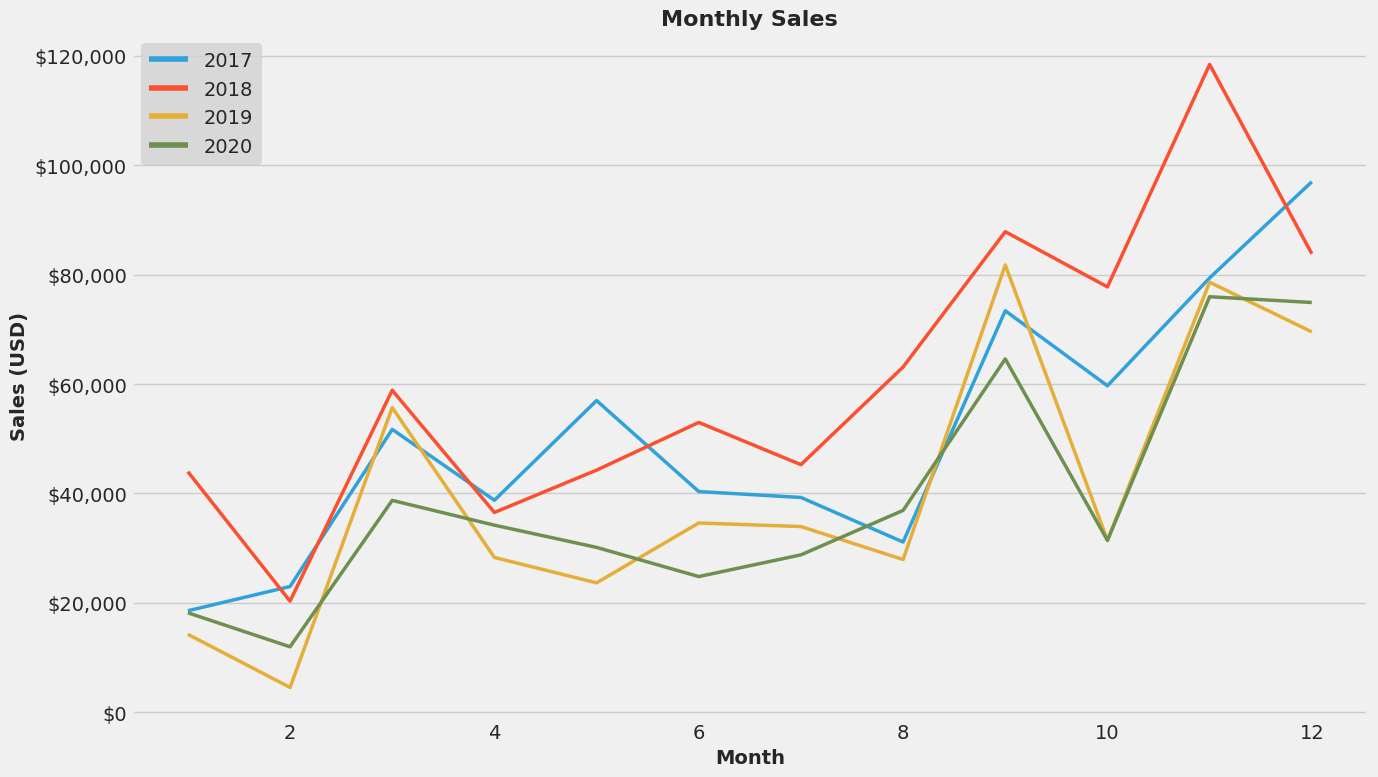

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.style.use('fivethirtyeight')

colors = ['#30a2da', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b']

plt.figure(figsize=(14, 8))

# Plot the data
sns.lineplot(x="Month", y="Sales", hue="Year", data=Monthly_Sales, palette=colors, linewidth=2.5)

# Set the title and labels
plt.title('Monthly Sales', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Sales (USD)', fontsize=14, fontweight='bold')

# Format y-axis ticks as USD currency
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Remove vertical grid lines
plt.gca().xaxis.grid(False)

# Adjust the legend background color
legend = plt.legend()
frame = legend.get_frame()
frame.set_facecolor('lightgrey')

# Display the plot
plt.tight_layout()
plt.show()



As the graph portrays, sales are highest during the holiday season. This trend can suggest several things:
1. The company could benefit from targeted marketing campaigns during this holiday season to further boost sales. This could include holiday-themed promotions or discounts, special holiday products, or increased advertising.
2. Understanding this trend can help with inventory management. The company can ensure it has enough stock to meet increased demand during these months and could reduce stock for the slower months to minimize storage costs and decrease the chance of items going unsold.
3. The company might need to adjust its staffing during the peak season to handle increased customer demand. This could include hiring seasonal workers or adjusting work schedules.
4. The seasonal trend should be taken into account when doing sales forecasting for the upcoming year. This can help set realistic expectations and better plan the business operations.
5. During the slower months, the company might consider strategies to boost sales, like off-season sales or promotions.

In [16]:
# Identify the top 10 best-selling products
Top_Products = SalesData.groupby('Product Name').Quantity.sum().sort_values(ascending=False).head(10)
print(Top_Products)


Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64


In [17]:
import matplotlib
print(matplotlib.get_cachedir())


/root/.cache/matplotlib


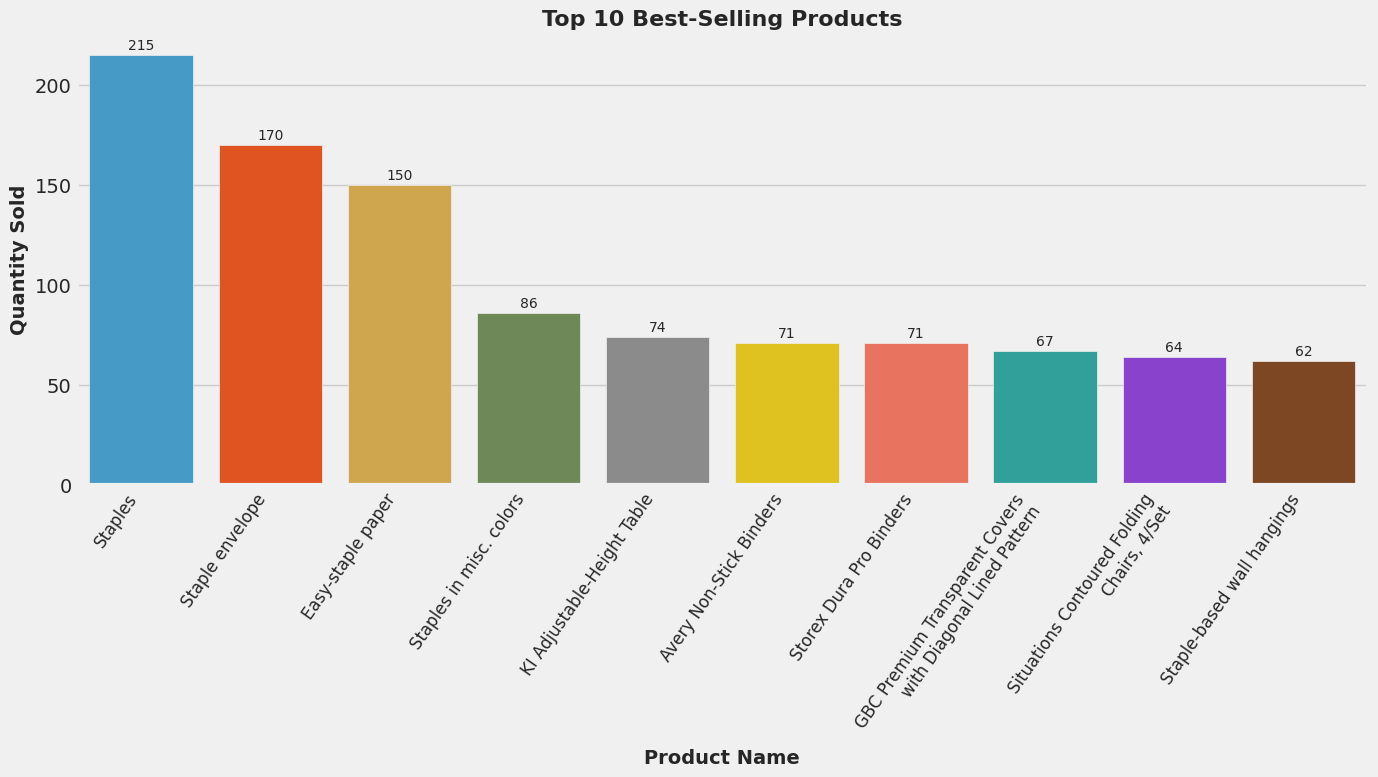

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

plt.style.use('fivethirtyeight')

colors = ['#30a2da', '#FF4500', '#e5ae38', '#6d904f', '#8b8b8b', '#FFD700', '#FF6347', '#20B2AA', '#8A2BE2', '#8B4513']

Top_Products = SalesData.groupby('Product Name').Quantity.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(14, 8))

sns.barplot(x=Top_Products.index, y=Top_Products.values, palette=colors)

plt.title('Top 10 Best-Selling Products', fontsize=16, fontweight='bold')
plt.ylabel('Quantity Sold', fontsize=14, fontweight='bold')
plt.xlabel('Product Name', fontsize=14, fontweight='bold')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=55, ha='right', fontsize=12)

# Adjust the text wrapping for better readability
labels = ['\n'.join(wrap(label, 30)) for label in Top_Products.index]
plt.gca().set_xticklabels(labels)

# Add annotations to the bars
for index, value in enumerate(Top_Products.values):
    plt.text(index, value + 5, str(value), ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()


In [19]:
# Determine the most profitable product category
Profitable_Category = SalesData.groupby('Category').Profit.sum().sort_values(ascending=False)
print(Profitable_Category)


Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64


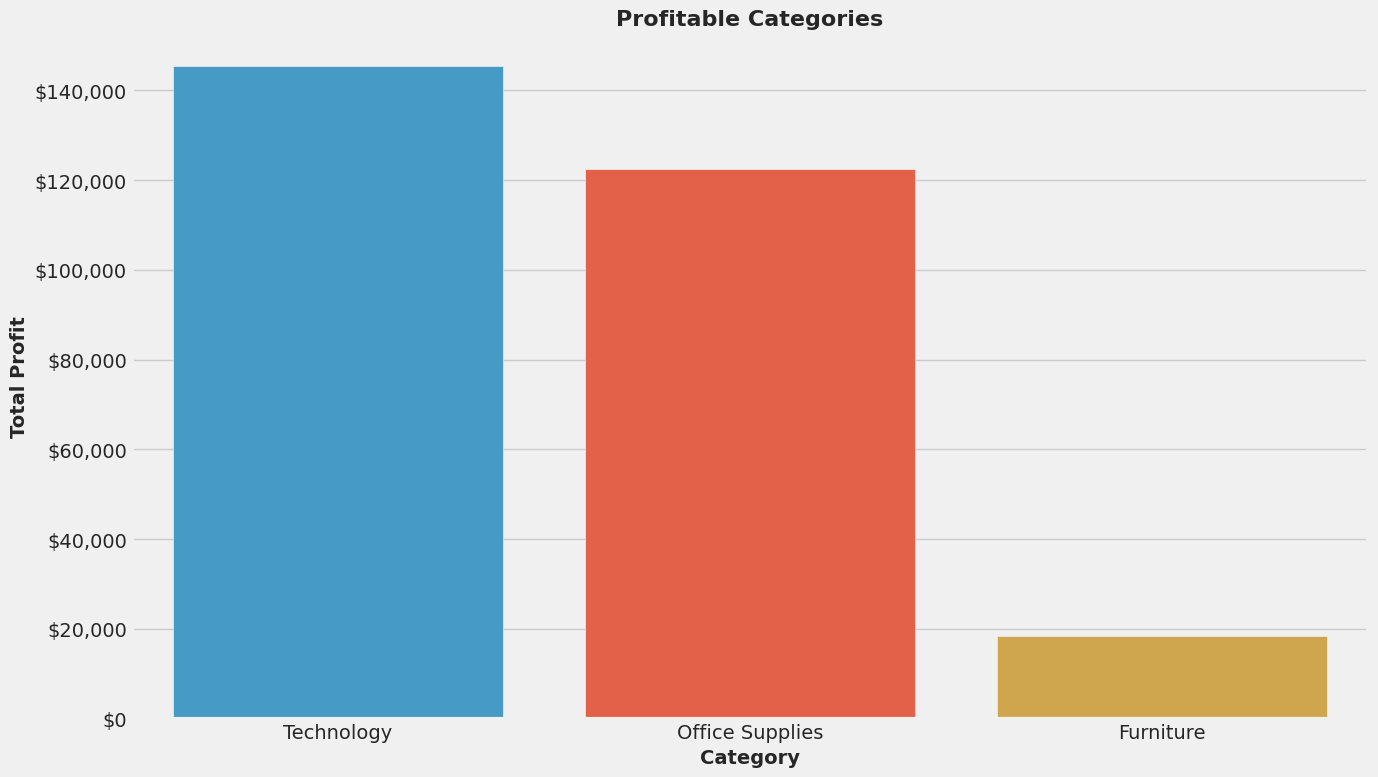

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.style.use('fivethirtyeight')

colors = ['#30a2da', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b']

Profitable_Category = SalesData.groupby('Category').Profit.sum().sort_values(ascending=False)

plt.figure(figsize=(14, 8))

# Plot the data
sns.barplot(x=Profitable_Category.index, y=Profitable_Category.values, palette=colors)

# Set the title and labels with bold font
plt.title('Profitable Categories', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14, fontweight='bold')
plt.ylabel('Total Profit', fontsize=14, fontweight='bold')

plt.xticks(rotation=0)

# Format y-axis ticks as USD currency
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


# ***Customer Behavior Analysis***

In [21]:
# Analyze Customer Segments
customer_segment = SalesData.groupby('Segment').agg({'Sales':'sum', 'Profit':'sum', 'Quantity':'sum'}).reset_index()

print(customer_segment)


       Segment         Sales       Profit  Quantity
0     Consumer  1.161401e+06  134119.2092     19521
1    Corporate  7.061464e+05   91979.1340     11608
2  Home Office  4.296531e+05   60298.6785      6744


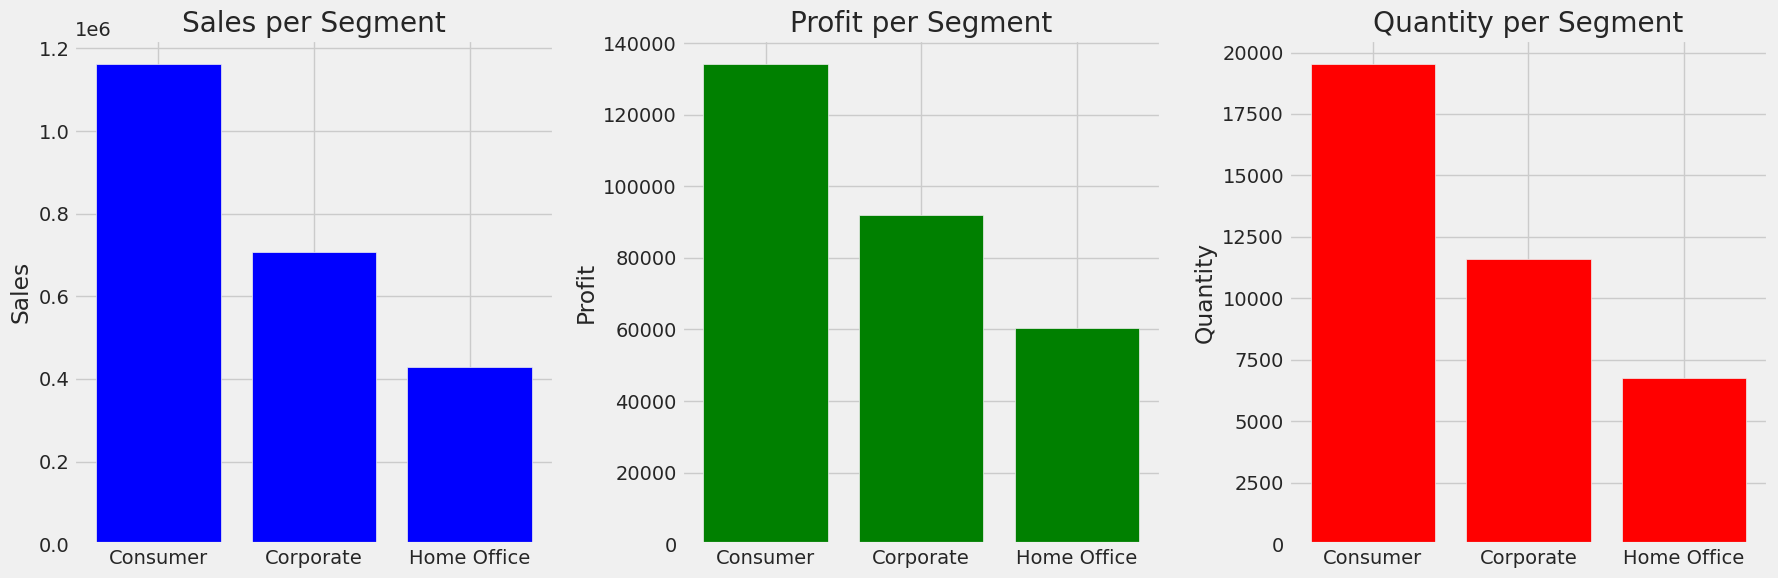

In [22]:
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Sales
ax[0].bar(customer_segment['Segment'], customer_segment['Sales'], color='blue')
ax[0].set_title('Sales per Segment')
ax[0].set_ylabel('Sales')

# Profit
ax[1].bar(customer_segment['Segment'], customer_segment['Profit'], color='green')
ax[1].set_title('Profit per Segment')
ax[1].set_ylabel('Profit')

# Quantity
ax[2].bar(customer_segment['Segment'], customer_segment['Quantity'], color='red')
ax[2].set_title('Quantity per Segment')
ax[2].set_ylabel('Quantity')

plt.tight_layout()
plt.show()


Now, going to divide into RFM segmentation, which is a popular technique to understand customer behavior.

In [23]:
latest_date = SalesData['Order Date'].max()

# Calculate recency
SalesData['Recency'] = (latest_date - SalesData['Order Date']).dt.days


In [24]:
RFM_Score = SalesData.groupby('Customer ID').agg({'Order ID': 'count', 'Sales': 'sum', 'Recency': 'min'})

# Rename the columns
RFM_Score.rename(columns={'Order ID': 'Frequency',
                          'Sales': 'Monetary'}, inplace=True)

print(RFM_Score.head())


             Frequency  Monetary  Recency
Customer ID                              
AA-10315            11  5563.560       88
AA-10375            15  1056.390       48
AA-10480            12  1790.512      607
AA-10645            18  5086.935       44
AB-10015             6   886.156      665


In [25]:
#The simplest way to create RFM segments is to use quartiles. We assign a score from 1 to 4 to Recency, Frequency, and
# Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply
#by combining individual RFM score numbers.
RFM_Score_Seg = RFM_Score.copy()

# Divide into segments using quartiles
RFM_Score_Seg['Recency_Score'] = pd.qcut(RFM_Score_Seg['Recency'], 4, labels=list(range(4, 0, -1)))
RFM_Score_Seg['Frequency_Score'] = pd.qcut(RFM_Score_Seg['Frequency'].rank(method="first"), 4, labels=list(range(1, 5)))
RFM_Score_Seg['Monetary_Score'] = pd.qcut(RFM_Score_Seg['Monetary'], 4, labels=list(range(1, 5)))

# Combine the RFM scores
RFM_Score_Seg['RFM_Score'] = RFM_Score_Seg[['Recency_Score', 'Frequency_Score', 'Monetary_Score']].sum(axis=1)

print(RFM_Score_Seg.head())


             Frequency  Monetary  Recency Recency_Score Frequency_Score  \
Customer ID                                                               
AA-10315            11  5563.560       88             3               2   
AA-10375            15  1056.390       48             3               3   
AA-10480            12  1790.512      607             1               2   
AA-10645            18  5086.935       44             3               4   
AB-10015             6   886.156      665             1               1   

            Monetary_Score  RFM_Score  
Customer ID                            
AA-10315                 4          9  
AA-10375                 1          7  
AA-10480                 2          5  
AA-10645                 4         11  
AB-10015                 1          3  


In [26]:
import numpy as np


In [27]:
# Define rfm_level function
def rfm_level(df):
    if np.bool(df['RFM_Score'] >= 10):
        return 'Best Customers'
    elif np.bool(df['Frequency_Score'] == 4):
        return 'Loyal Customers'
    elif np.bool(df['Monetary_Score'] == 4):
        return 'Big Spenders'
    else:
        return 'Almost Lost'

# Creating a new variable RFM_Level
RFM_Score_Seg['RFM_Level'] = RFM_Score_Seg.apply(rfm_level, axis=1)

print(RFM_Score_Seg.head())


             Frequency  Monetary  Recency Recency_Score Frequency_Score  \
Customer ID                                                               
AA-10315            11  5563.560       88             3               2   
AA-10375            15  1056.390       48             3               3   
AA-10480            12  1790.512      607             1               2   
AA-10645            18  5086.935       44             3               4   
AB-10015             6   886.156      665             1               1   

            Monetary_Score  RFM_Score       RFM_Level  
Customer ID                                            
AA-10315                 4          9    Big Spenders  
AA-10375                 1          7     Almost Lost  
AA-10480                 2          5     Almost Lost  
AA-10645                 4         11  Best Customers  
AB-10015                 1          3     Almost Lost  


<ipython-input-27-d39051713dd3>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.bool(df['RFM_Score'] >= 10):
<ipython-input-27-d39051713dd3>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif np.bool(df['Frequency_Score'] == 4):
<ipython-input-27-d39051713dd3>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. 

In [28]:
# Count of customers in each segment
customer_count = RFM_Score_Seg['RFM_Level'].value_counts()
print(customer_count)

# Average values for each RFM_Level
average_values = RFM_Score_Seg.groupby('RFM_Level').mean()
print(average_values)


Almost Lost        479
Best Customers     208
Big Spenders        54
Loyal Customers     52
Name: RFM_Level, dtype: int64
                 Frequency     Monetary     Recency  RFM_Score
RFM_Level                                                     
Almost Lost       9.075157  1514.669447  286.576200   5.924843
Best Customers   19.158654  5158.472646   70.764423  10.653846
Big Spenders     11.925926  5938.564894  316.574074   8.351852
Loyal Customers  19.576923  3423.641935  352.269231   8.519231


<ipython-input-28-90a33edc803c>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_values = RFM_Score_Seg.groupby('RFM_Level').mean()


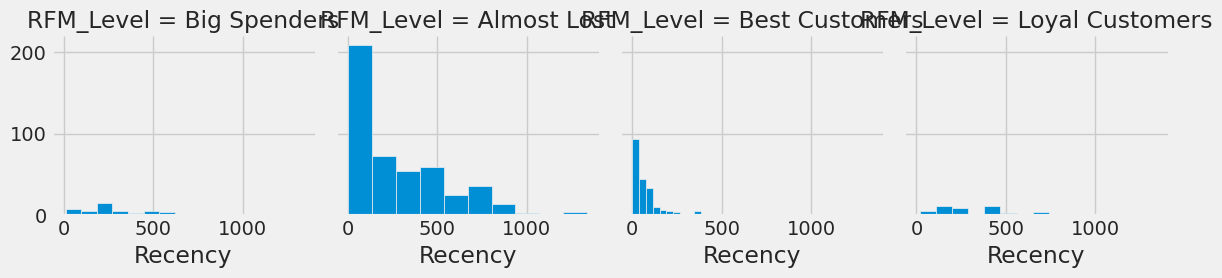

In [29]:
# Histogram of Recency for each segment
g = sns.FacetGrid(RFM_Score_Seg, col="RFM_Level")
g.map(plt.hist, "Recency")


In [30]:
region_category_sales = SalesData.groupby(['Region', 'Category']).agg({'Sales': 'sum'}).reset_index()
region_category_sales_pivot = region_category_sales.pivot(index='Category', columns='Region', values='Sales')
print(region_category_sales_pivot)


Region               Central        East       South         West
Category                                                         
Furniture        163797.1638  208291.204  117298.684  252612.7435
Office Supplies  167026.4150  205516.055  125651.313  220853.2490
Technology       170416.3120  264973.981  148771.908  251991.8320


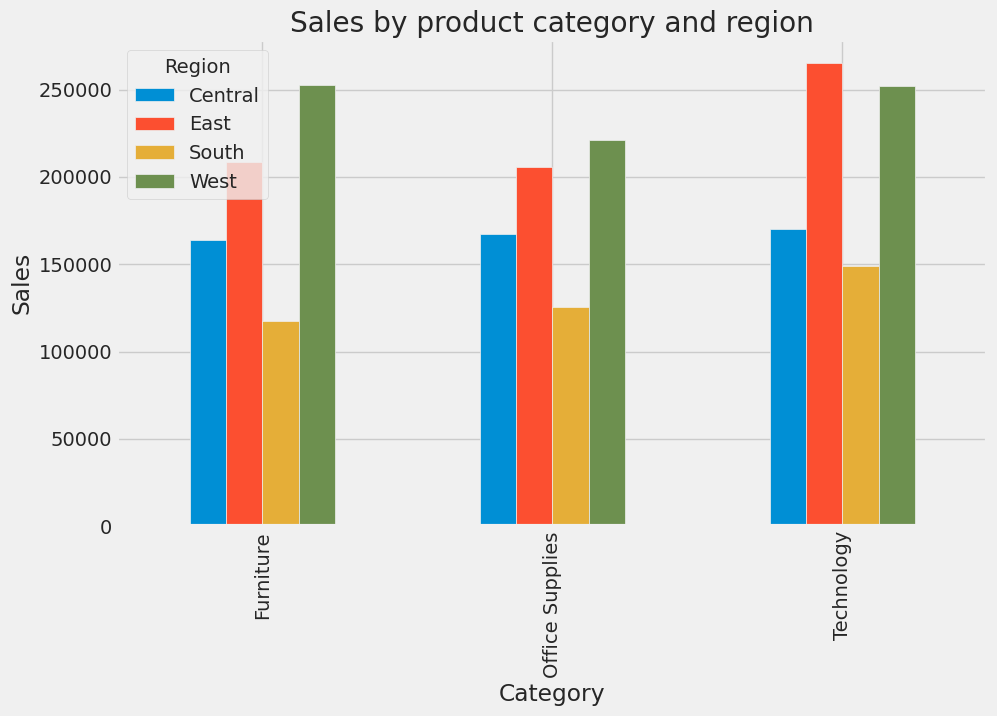

In [31]:
region_category_sales_pivot.plot(kind='bar', figsize=(10,6))
plt.ylabel('Sales')
plt.title('Sales by product category and region')
plt.show()


These insights can be useful for strategizing marketing campaigns or assessing the the performance of regional sales teams.

# ***Profitability Analysis***

In [32]:
#Profit ratio analysis- how much of the sales is turned into profit
SalesData['Profit Ratio'] = SalesData['Profit'] / SalesData['Sales']
print(SalesData.head())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0    4919  CA-2017-160304 2017-01-02 2017-01-07  Standard Class    BM-11575   
1    4920  CA-2017-160304 2017-01-02 2017-01-07  Standard Class    BM-11575   
2    3074  CA-2017-125206 2017-01-03 2017-01-05     First Class    LR-16915   
3    8604  US-2017-116365 2017-01-03 2017-01-08  Standard Class    CA-12310   
4    8605  US-2017-116365 2017-01-03 2017-01-08  Standard Class    CA-12310   

       Customer Name    Segment        Country          City  ...  \
0      Brendan Murry  Corporate  United States  Gaithersburg  ...   
1      Brendan Murry  Corporate  United States  Gaithersburg  ...   
2       Lena Radford   Consumer  United States   Los Angeles  ...   
3  Christine Abelman  Corporate  United States   San Antonio  ...   
4  Christine Abelman  Corporate  United States   San Antonio  ...   

  Sub-Category                                       Product Name   Sales  \
0    Bookcases  Bush Westfield Co

In [33]:
#Product category profitability
category_profitability = SalesData.groupby('Category')['Profit Ratio'].mean()
print(category_profitability)


Category
Furniture          0.038784
Office Supplies    0.138030
Technology         0.156138
Name: Profit Ratio, dtype: float64


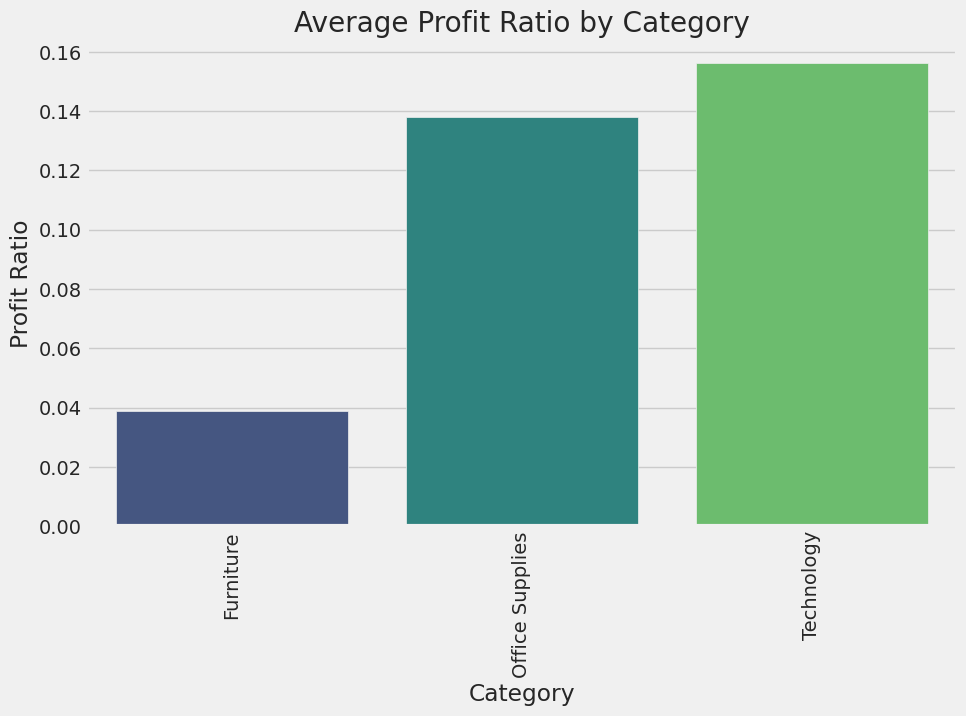

In [34]:
category_profitability = SalesData.groupby('Category')['Profit Ratio'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=category_profitability.index, y=category_profitability.values, palette='viridis')
plt.title('Average Profit Ratio by Category')
plt.ylabel('Profit Ratio')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.show()

In [35]:
#Sub-category profitability
subcategory_profitability = SalesData.groupby('Sub-Category')['Profit Ratio'].mean()
print(subcategory_profitability)


Sub-Category
Accessories    0.218210
Appliances    -0.156869
Art            0.251646
Binders       -0.199595
Bookcases     -0.126640
Chairs         0.043900
Copiers        0.317194
Envelopes      0.423140
Fasteners      0.299171
Furnishings    0.137066
Labels         0.429663
Machines      -0.072026
Paper          0.425600
Phones         0.119222
Storage        0.089113
Supplies       0.112039
Tables        -0.147727
Name: Profit Ratio, dtype: float64


Region
Central   -0.104073
East       0.167227
South      0.163519
West       0.219487
Name: Profit Ratio, dtype: float64


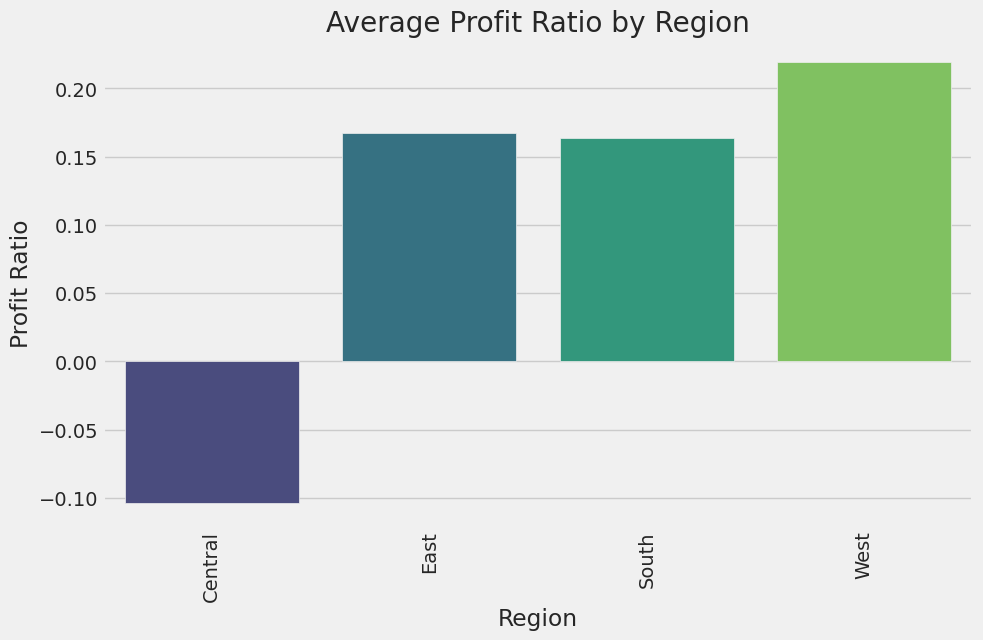

In [36]:
#Regional Profitability
region_profitability = SalesData.groupby('Region')['Profit Ratio'].mean()
print(region_profitability)
plt.figure(figsize=(10,6))
sns.barplot(x=region_profitability.index, y=region_profitability.values, palette='viridis')
plt.title('Average Profit Ratio by Region')
plt.ylabel('Profit Ratio')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.show()


In [37]:
# Calculate total sales volume by region
sales_volume = SalesData.groupby('Region')['Quantity'].sum()

# Calculate total revenue by region
total_revenue = SalesData.groupby('Region')['Sales'].sum()

# Calculate total profit by region
total_profit = SalesData.groupby('Region')['Profit'].sum()

# Calculate total cost by region as Sales - Profit
total_cost = total_revenue - total_profit

# Calculate profit margin as profit / revenue
profit_margin = total_profit / total_revenue

# Print the sales volume and profit margin for each region
print("Sales Volume by Region:\n", sales_volume)
print("\nProfit Margin by Region:\n", profit_margin)



Sales Volume by Region:
 Region
Central     8780
East       10618
South       6209
West       12266
Name: Quantity, dtype: int64

Profit Margin by Region:
 Region
Central    0.079216
East       0.134834
South      0.119343
West       0.149448
dtype: float64


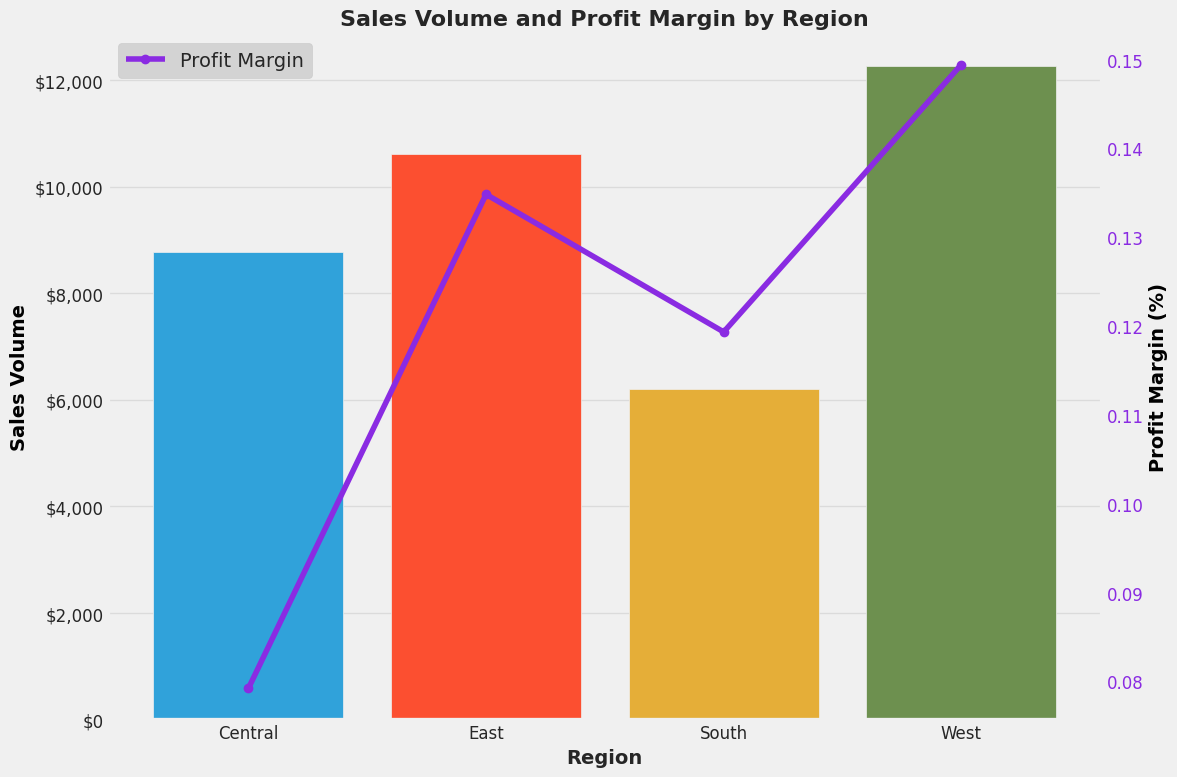

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.style.use('fivethirtyeight')

colors = ['#30a2da', '#fc4f30', '#e5ae38', '#6d904f']

fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar plot for sales volume with alpha set to 1
bars = ax1.bar(sales_volume.index, sales_volume, color=colors, alpha=1)
ax1.set_xlabel('Region', fontsize=14, fontweight='bold')
ax1.set_ylabel('Sales Volume', color='black', fontsize=14, fontweight='bold')
ax1.tick_params('y', labelsize=12)
ax1.tick_params('x', rotation=0, labelsize=12)

# Format y-axis ticks of ax1 as USD currency
formatter = mticker.StrMethodFormatter('${x:,.0f}')
ax1.yaxis.set_major_formatter(formatter)

# Include horizontal grid lines for sales volume
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgray', alpha=0.7)
ax1.xaxis.grid(False)  # Remove vertical grid lines

# Create a second y-axis for the profit margin
ax2 = ax1.twinx()
ax2.plot(profit_margin.index, profit_margin, color='#8A2BE2', marker='o', label='Profit Margin')
ax2.set_ylabel('Profit Margin (%)', color='black', fontsize=14, fontweight='bold')
ax2.tick_params('y', colors='#8A2BE2', labelsize=12)

# Align grids
ax2.grid(None)

# Title
plt.title('Sales Volume and Profit Margin by Region', fontsize=16, fontweight='bold')

# Display the legend with only the profit margin line
ax2.legend(loc='upper left', framealpha=1, frameon=True, facecolor='lightgray')

plt.tight_layout()
plt.show()




In [39]:
#Time-series profitability
SalesData['Order Date'] = pd.to_datetime(SalesData['Order Date'])  # Ensuring 'Order Date' is in datetime format.
SalesData['YearMonth'] = SalesData['Order Date'].apply(lambda x: x.strftime('%Y-%m'))  # Creating a 'YearMonth' column.
timeseries_profitability = SalesData.groupby('YearMonth')['Profit Ratio'].mean()
print(timeseries_profitability)


YearMonth
2017-01    0.177127
2017-02    0.184472
2017-03    0.047902
2017-04    0.131821
2017-05    0.077928
2017-06    0.147169
2017-07    0.135116
2017-08    0.085547
2017-09    0.147298
2017-10    0.138105
2017-11    0.136964
2017-12    0.154041
2018-01    0.079094
2018-02    0.062361
2018-03    0.151607
2018-04    0.052169
2018-05    0.100602
2018-06    0.070275
2018-07    0.154143
2018-08    0.158343
2018-09    0.148937
2018-10    0.087705
2018-11    0.112124
2018-12    0.133427
2019-01    0.128582
2019-02    0.051812
2019-03    0.131002
2019-04    0.228904
2019-05    0.120751
2019-06    0.112705
2019-07    0.077606
2019-08    0.192368
2019-09    0.117732
2019-10    0.091737
2019-11    0.134060
2019-12    0.043668
2020-01    0.123952
2020-02    0.166555
2020-03    0.144574
2020-04    0.037677
2020-05    0.107187
2020-06    0.122339
2020-07    0.091498
2020-08    0.114836
2020-09    0.133501
2020-10    0.089347
2020-11    0.088983
2020-12    0.180122
Name: Profit Ratio, dtype: flo

<ipython-input-40-1579adfd60bb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = SalesData.groupby('YearMonth').sum().reset_index()


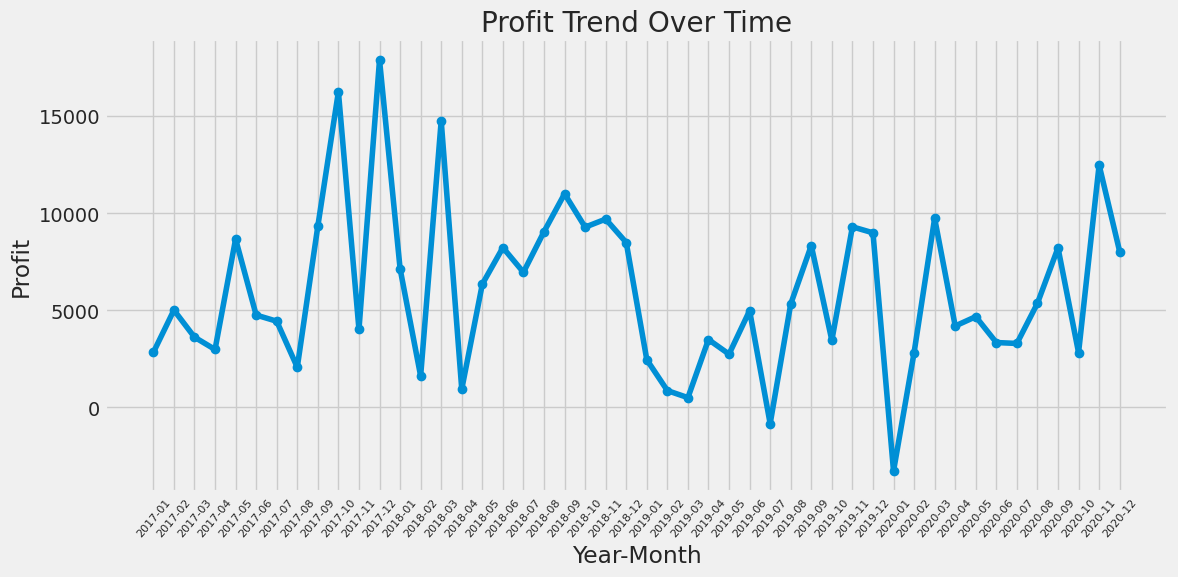

In [40]:
grouped = SalesData.groupby('YearMonth').sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot_date(grouped['YearMonth'], grouped['Profit'], linestyle='solid')
plt.xticks(rotation=50, fontsize=8)
plt.title('Profit Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()


In [41]:
#Customer Profitability
customer_profitability = SalesData.groupby('Customer ID')['Profit'].sum().sort_values(ascending=False)
print(customer_profitability.head(10))  # Top 10 most profitable customers.


Customer ID
TC-20980    8981.3239
RB-19360    6976.0959
SC-20095    5757.4119
HL-15040    5622.4292
AB-10105    5444.8055
TA-21385    4703.7883
CM-12385    3899.8904
KD-16495    3038.6254
AR-10540    2884.6208
DR-12940    2869.0760
Name: Profit, dtype: float64


In [42]:
#Profit per unit sold
SalesData['Profit per Unit'] = SalesData['Profit'] / SalesData['Quantity']
product_profitability = SalesData.groupby('Product Name')['Profit per Unit'].mean().sort_values(ascending=False)
print(product_profitability.head(10))  # Top 10 products with highest profit per unit sold.


Product Name
Canon imageCLASS 2200 Advanced Copier                                          1259.996400
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier           997.995000
Zebra ZM400 Thermal Label Printer                                               557.256000
Ativa V4110MDD Micro-Cut Shredder                                               342.995100
3D Systems Cube Printer, 2nd Generation, Magenta                                337.997400
Hewlett-Packard Desktjet 6988DT Refurbished Printer                             333.641000
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     330.457400
Ibico EPK-21 Electric Binding System                                            296.098433
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       268.331800
Canon PC1060 Personal Laser Copier                                              223.996800
Name: Profit per Unit, dtype: float64


Might want to promote these products more heavily and incentivize the sales team to sell more of these products.

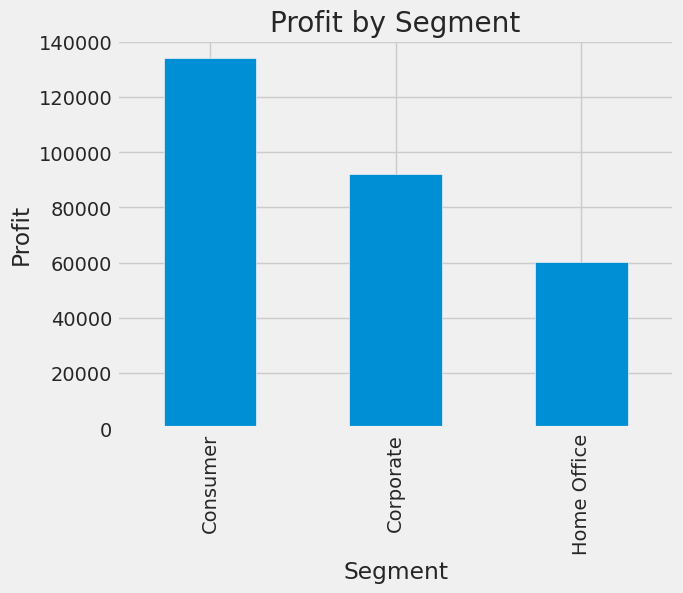

In [43]:
#Profit by segment
segment_profit = SalesData.groupby('Segment')['Profit'].sum()
segment_profit.plot(kind='bar')
plt.title('Profit by Segment')
plt.ylabel('Profit')
plt.show()


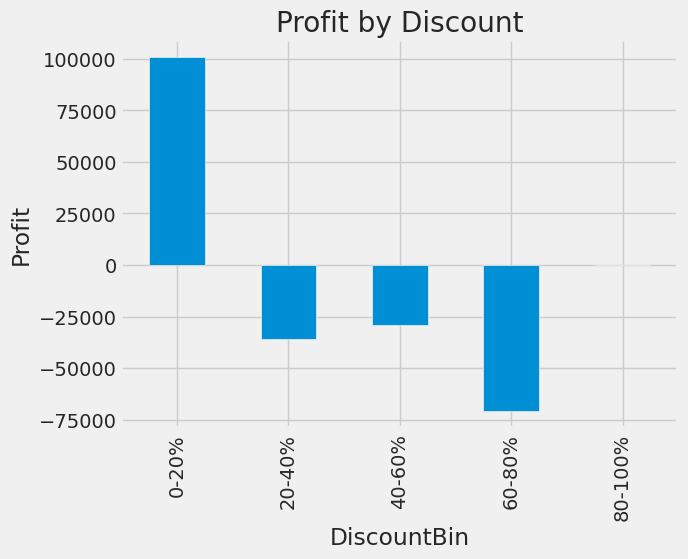

In [44]:
# First, categorize discounts into bins
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
SalesData['DiscountBin'] = pd.cut(SalesData['Discount'], bins=bins, labels=labels)

# Group by discount bin and calculate the sum of profit
discount_profit = SalesData.groupby('DiscountBin')['Profit'].sum()

# Plot the profit by discount bin
discount_profit.plot(kind='bar')
plt.title('Profit by Discount')
plt.ylabel('Profit')
plt.show()



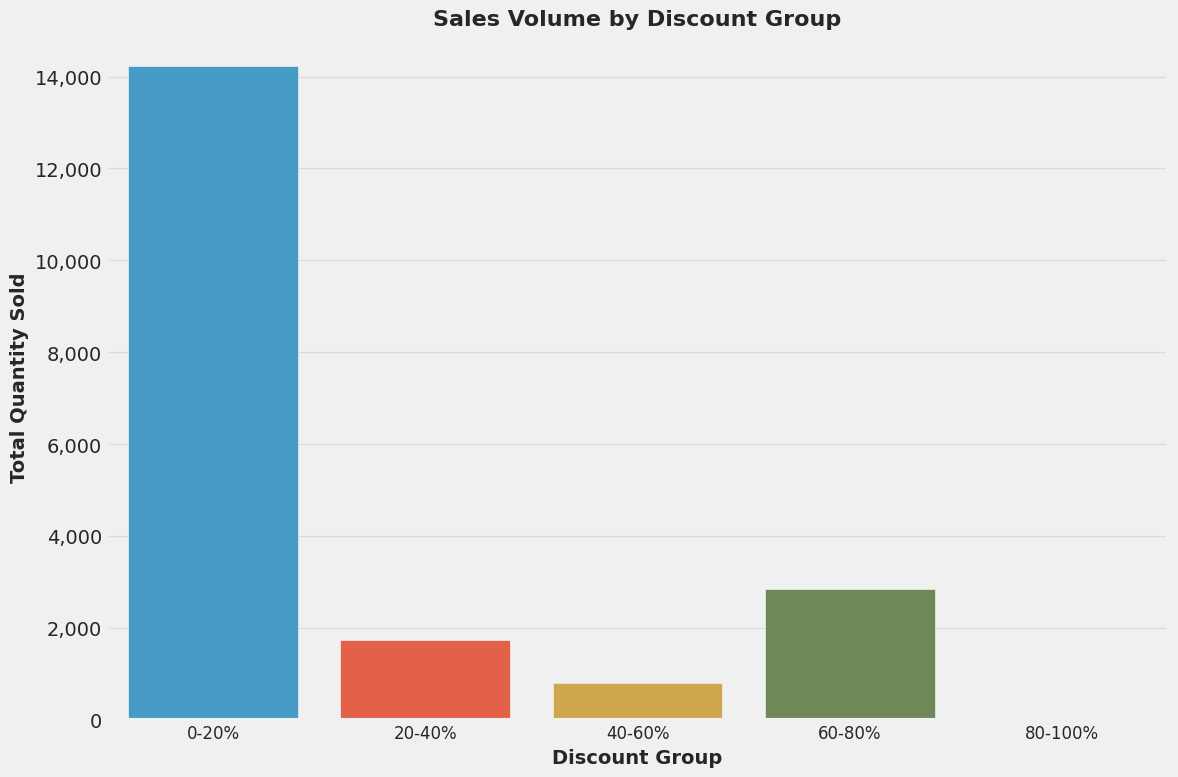

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.style.use('fivethirtyeight')

# Group by discount bin and calculate the sum of quantity
discount_profit = SalesData.groupby('DiscountBin')['Quantity'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
colors = ['#30a2da', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b']
bars = sns.barplot(x='DiscountBin', y='Quantity', data=discount_profit, palette=colors)

plt.title('Sales Volume by Discount Group', fontsize=16, fontweight='bold')
plt.xlabel('Discount Group', fontsize=14, fontweight='bold')
plt.ylabel('Total Quantity Sold', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)

# Format y-axis ticks with commas
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Remove vertical grid lines and keep horizontal ones
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgray', alpha=0.7)

plt.tight_layout()
plt.show()


Discounts over 20% don't bring in profit

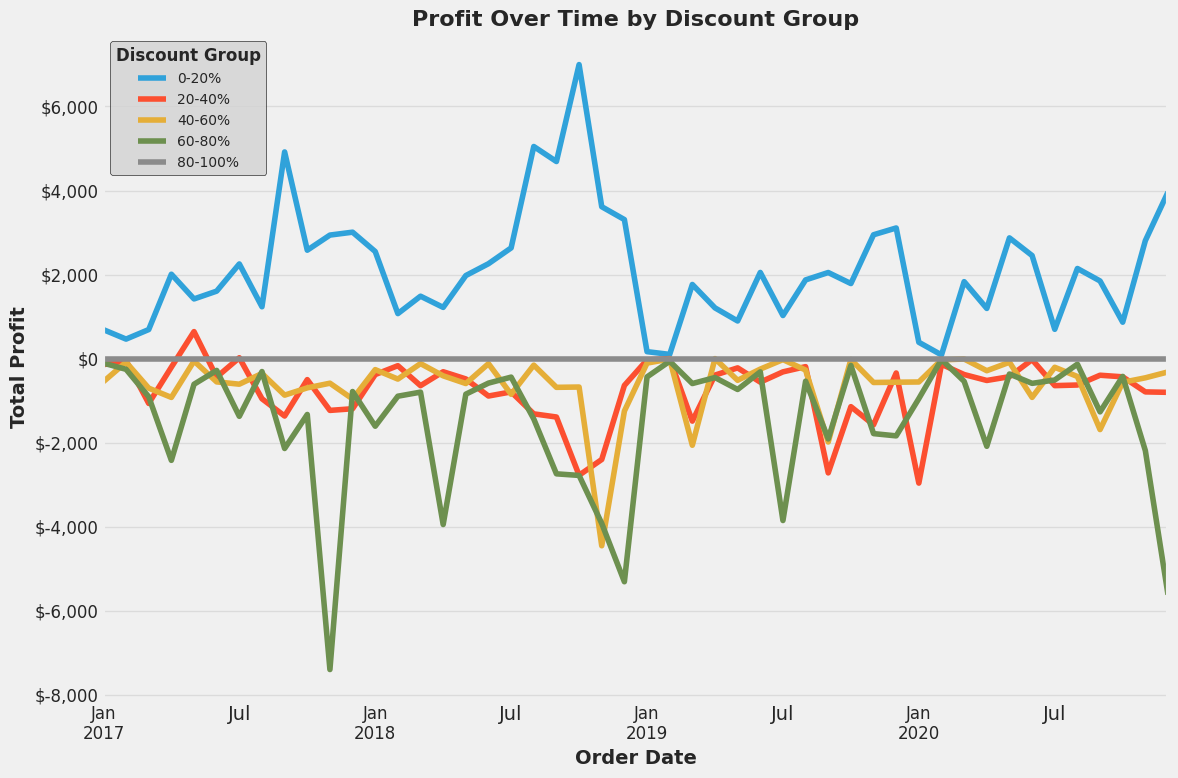

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.style.use('fivethirtyeight')

# Group by date and discount bin
profit_over_time = SalesData.groupby([SalesData['Order Date'].dt.to_period('M'), 'DiscountBin'])['Profit'].sum().reset_index(name='TotalProfit')

# Pivot this result for better readability and plotting
profit_over_time_pivot = profit_over_time.pivot(index='Order Date', columns='DiscountBin', values='TotalProfit')

# Plotting
colors = ['#30a2da', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b']
ax = profit_over_time_pivot.plot(kind='line', figsize=(12, 8), color=colors)

plt.title('Profit Over Time by Discount Group', fontsize=16, fontweight='bold')
plt.xlabel('Order Date', fontsize=14, fontweight='bold')
plt.ylabel('Total Profit', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format y-axis ticks as USD currency
formatter = mticker.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Remove vertical grid lines and keep horizontal ones
ax.xaxis.grid(False)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgray', alpha=0.7)

# Adjust the legend
legend = ax.legend(title="Discount Group", frameon=True, facecolor='lightgray', edgecolor='black', fontsize=10, loc='upper left')
plt.setp(legend.get_title(), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()



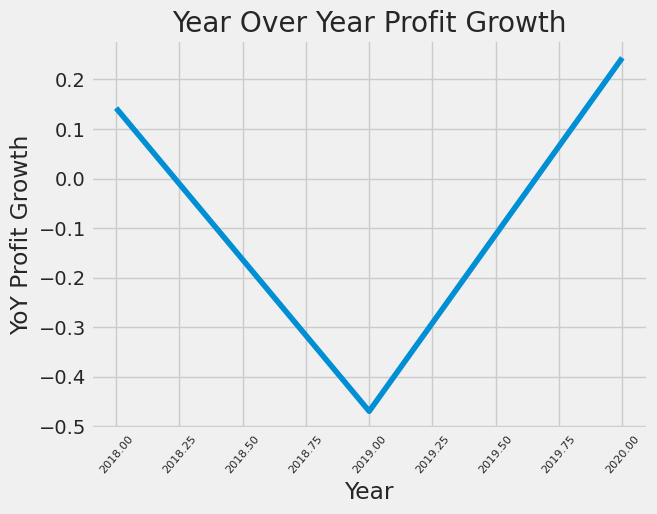

In [47]:
#Year over year profit growth
# First, we create a column for the Year
SalesData['Year'] = SalesData['Order Date'].dt.year

year_profit = SalesData.groupby('Year')['Profit'].sum()

# Calculate the Year Over Year growth in Profit
year_profit.pct_change().plot(kind='line')
plt.title('Year Over Year Profit Growth')
plt.ylabel('YoY Profit Growth')
plt.xticks(rotation=50, fontsize=8)
plt.show()


# ***Shipping mode analysis***

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64


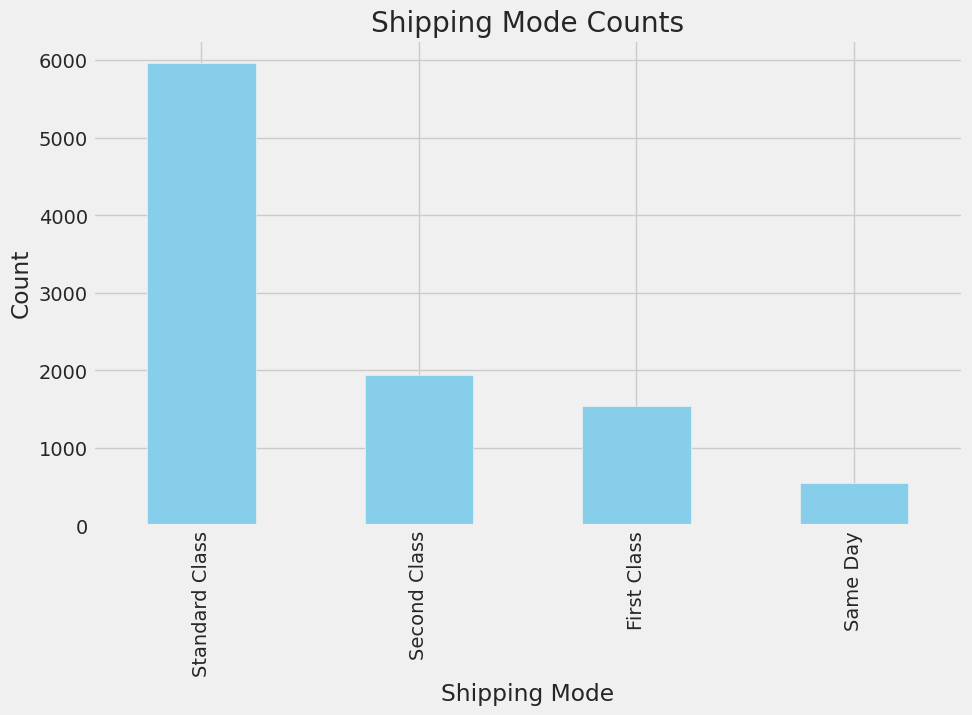

In [48]:
#Finding most commonly used shipping mode
shipping_mode_counts = SalesData['Ship Mode'].value_counts()
print(shipping_mode_counts)
plt.figure(figsize=(10, 6))
shipping_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Shipping Mode Counts')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.show()

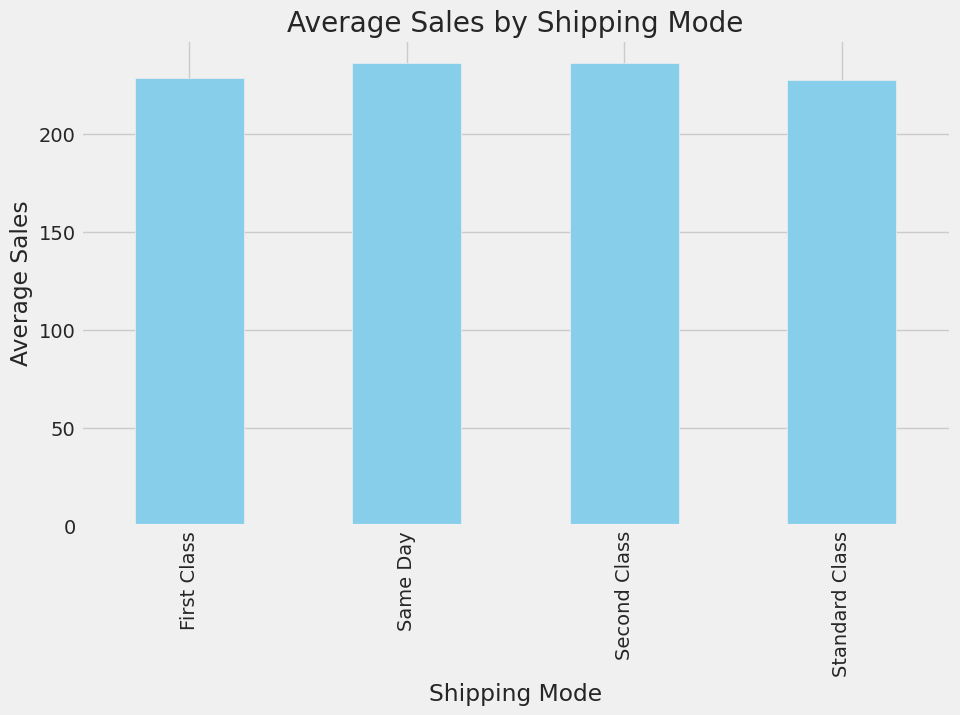

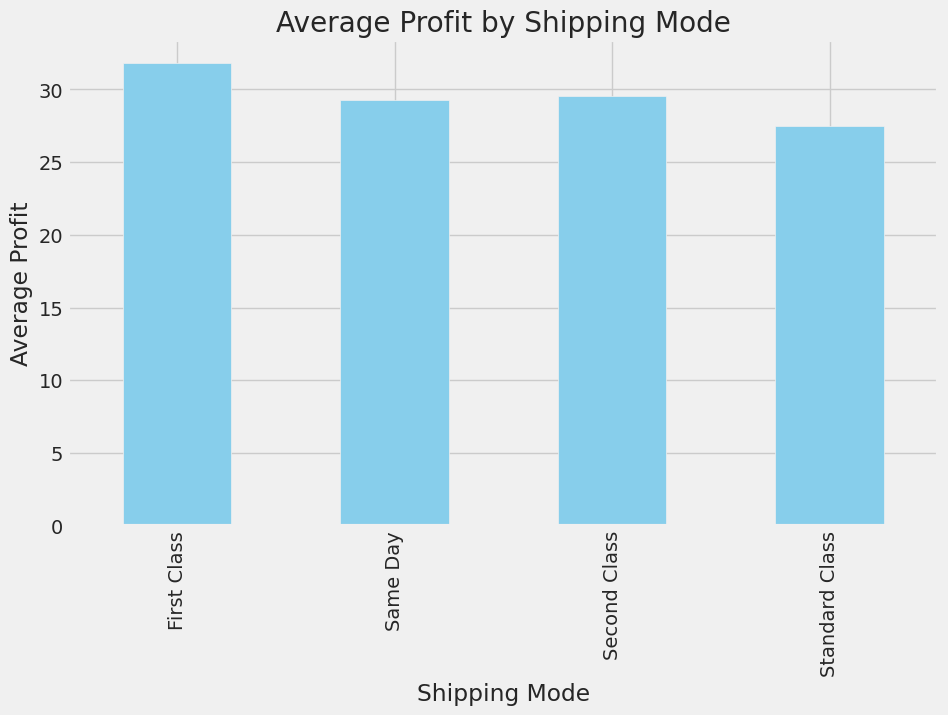

In [49]:
#Finding whether shipping method affects sales or profits
# Group by shipping mode and calculate mean sales and profit
grouped_shipping = SalesData.groupby('Ship Mode').agg({'Sales':'mean', 'Profit':'mean'})

# Plot Sales
plt.figure(figsize=(10, 6))
grouped_shipping['Sales'].plot(kind='bar', color='skyblue')
plt.title('Average Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Sales')
plt.show()

# Plot Profit
plt.figure(figsize=(10, 6))
grouped_shipping['Profit'].plot(kind='bar', color='skyblue')
plt.title('Average Profit by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Average Profit')
plt.show()


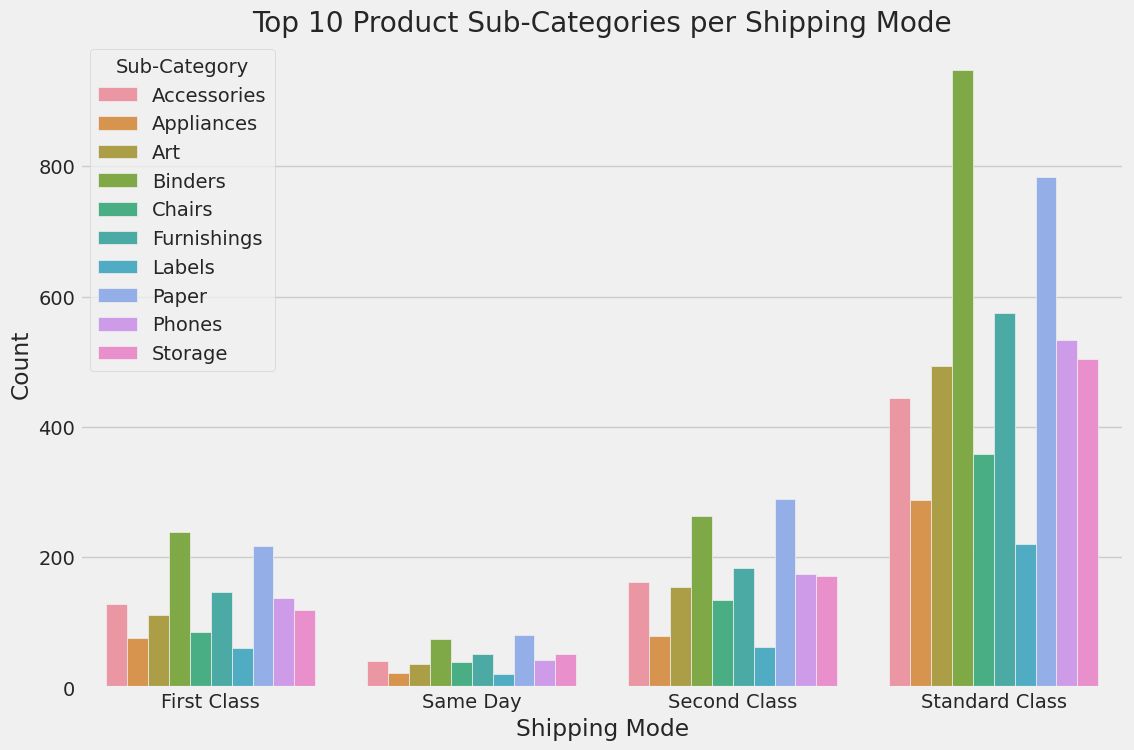

In [50]:
# Get top 10 sub-categories
top10_sub_categories = SalesData['Sub-Category'].value_counts().index[:10]

# Filter the data for these top 10 sub-categories
top10_sub_data = SalesData[SalesData['Sub-Category'].isin(top10_sub_categories)]

# Group by shipping mode and sub-category and count occurrences
grouped_shipping_subcategory = top10_sub_data.groupby(['Ship Mode', 'Sub-Category']).size().reset_index(name='Count')

# Plot a bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='Ship Mode', y='Count', hue='Sub-Category', data=grouped_shipping_subcategory)
plt.title('Top 10 Product Sub-Categories per Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Count')
plt.show()


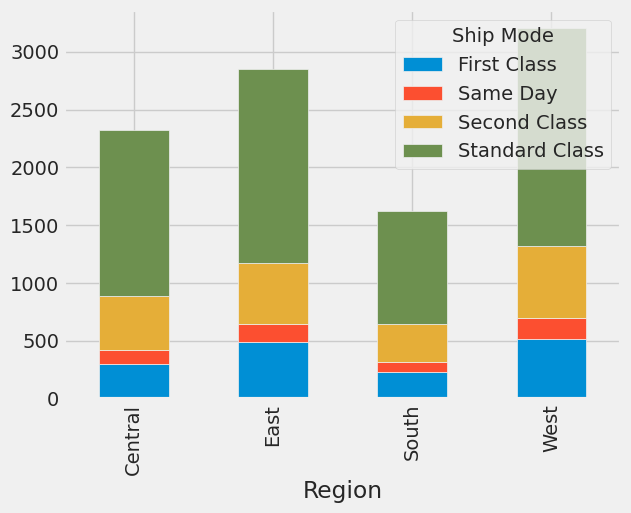

In [51]:
region_shipping = SalesData.groupby(['Region', 'Ship Mode']).size().unstack()
region_shipping.plot(kind='bar', stacked=True)
plt.show()


Shipping mode analysis can be used for product planning, such as inventory. It can also inform the marketing and sales strategy to maybe create bundles or small discounts involving these products to boost sales.